## Importing Needed packages

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pylab as pl

## Reading the data in

In [6]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understanding the Data

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELCONSUMPTION_CITY']]
cdf.head(9)
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Plotting the Dataset

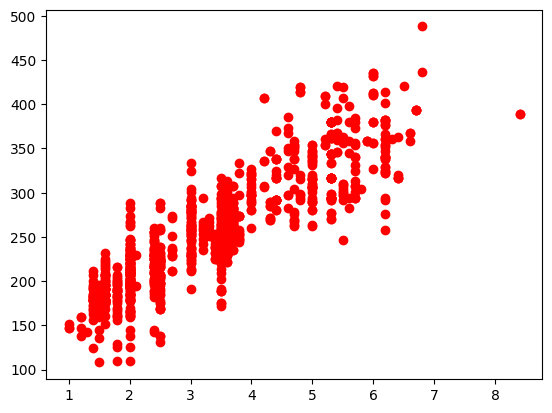

In [8]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS, color="red")

## Creating train and test dataset

In [9]:
msk = np.random.rand(len(df))<.8
train=cdf[msk]
test=cdf[~msk]

## Polynomial regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]], shape=(851, 4))

## Coefficient and Intercept

In [11]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly,train_y)
print("Coefficients: ",clf.coef_)
print("Intercept: : ", clf.intercept_)

Coefficients:  [[ 0.         22.9569728   6.12800565 -0.62841841]]
Intercept: :  [136.33585546]


## Plot

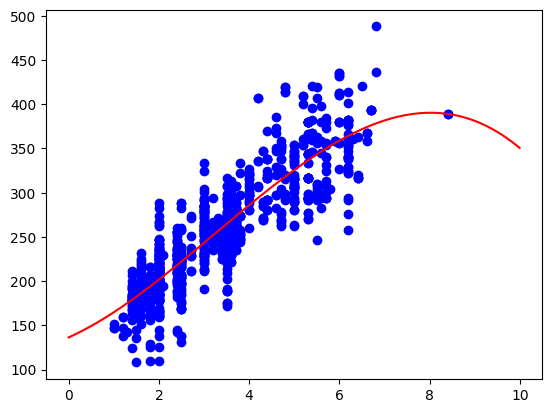

In [12]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS, color="blue")
XX = np.arange(0.0,10.0,0.01)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2) + clf.coef_[0][3]*np.power(XX,3)
plt.plot(XX,yy, "-r")

## Evaluation

In [13]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)
print("Residual sum of squares : %.2f" % np.mean((test_y_ - test_y)**2))
print("Mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2_Score : %.2f" % r2_score(test_y,test_y_))


Residual sum of squares : 877.57
Mean absolute error : 22.94
R2_Score : 0.77
